# Linear Regression

Linear regression is a fundamental statistical method used in data science and machine learning to model the relationship between one dependent variable and one or more independent variables. It is one of the simplest and most widely used techniques for predictive analysis.

## Key Concepts

### 1. Dependent and Independent Variables

- **Dependent Variable**: The variable you are trying to predict or explain, denoted as $y$.
- **Independent Variables**: The variables used to predict the dependent variable, denoted as $x_1, x_2, \dots, x_n$.

### 2. Equation of a Linear Model

#### Simple Linear Regression

For simple linear regression (with one independent variable), the relationship is modeled as:
$$
y = \beta_0 + \beta_1 x + \epsilon
$$
- $y$: Dependent variable
- $x$: Independent variable
- $\beta_0$: Intercept (value of $y$ when $x$ is 0)
- $\beta_1$: Slope (change in $y$ for a one-unit change in $x$)
- $\epsilon$: Error term (difference between observed and predicted values of $y$)

#### Multiple Linear Regression

For multiple linear regression (with multiple independent variables), the model extends to:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$
- $y$: Dependent variable
- $x_1, x_2, \dots, x_n$: Independent variables
- $\beta_0$: Intercept
- $\beta_1, \beta_2, \dots, \beta_n$: Coefficients of the predictors
- $\epsilon$: Error term

### 3. Objective

The goal of linear regression (both simple and multiple) is to find the values of the coefficients $\beta_0, \beta_1, \dots, \beta_n$ that minimize the difference between the predicted and actual values of $y$. This is achieved using **Least Squares**, which minimizes the sum of the squared differences between observed and predicted values.

### 4. Calculation of Coefficients

#### Simple Linear Regression

- **Slope $\beta_1$**:
  $$
  \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
  $$

- **Intercept $\beta_0$**:
  $$
  \beta_0 = \bar{y} - \beta_1 \bar{x}
  $$

#### Multiple Linear Regression

For multiple regression, the coefficients $\beta_j$ are computed using matrix algebra to solve the normal equations:
$$
\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$
where $\mathbf{X}$ is the matrix of independent variables (including a column of ones for the intercept), and $\mathbf{y}$ is the vector of observed values.

## Key Statistical Metrics in Linear Regression

### 1. Residual

The residual is the difference between the observed value of the dependent variable and the value predicted by the model:
$$
e_i = y_i - \hat{y}_i
$$

### 2. Residual Sum of Squares (RSS)

RSS measures the total discrepancy between observed values and predicted values:
$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

### 3. Residual Standard Error (RSE)

RSE measures the average distance of observed values from the regression line:
$$
\text{RSE} = \sqrt{\frac{\text{RSS}}{n - p - 1}}
$$
where $n$ is the number of observations and $p$ is the number of predictors (including the intercept term).

### 4. Standard Error of the Coefficients

The Standard Error of the coefficients measures the precision of the estimated coefficients. For a coefficient $\hat{\beta}_j$, it is calculated as:
$$
\text{SE}(\hat{\beta}_j) = \sqrt{\text{Var}(\hat{\beta}_j)}
$$
where $\text{Var}(\hat{\beta}_j)$ is the variance of the coefficient estimate.

### 5. t-Statistics

The t-statistic tests the null hypothesis that a regression coefficient is equal to zero:
$$
t = \frac{\hat{\beta}_j}{\text{SE}(\hat{\beta}_j)}
$$
where $\hat{\beta}_j$ is the estimated coefficient and $\text{SE}(\hat{\beta}_j)$ is its standard error.

### 6. p-Value

The p-value measures the probability of observing the data if the null hypothesis is true. It tests whether the coefficient is significantly different from zero. A low p-value (< 0.05) indicates statistical significance.

### 7. R-Squared ($R^2$)

R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variables:
$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$
where TSS is the Total Sum of Squares:
$$
\text{TSS} = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

### 8. Correlation

Correlation measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1.

### 9. Covariance

Covariance measures how two variables change together:
$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$$

### 10. F-Statistic 

The F-statistic is used to assess the overall significance of a linear regression model. It tests whether the model as a whole provides a better fit to the data compared to a model with no predictors.

The F-statistic is calculated as:
$$
F = \frac{\text{MSR}}{\text{MSE}}
$$
where:
- **MSR (Mean Square for Regression)** is given by:
$$
\text{MSR} = \frac{\text{SSR}}{p}
$$
- **MSE (Mean Squared Error)** is given by:
$$
\text{MSE} = \frac{\text{RSS}}{n - p - 1}
$$

Combining these, the formula becomes:
$$
F = \frac{\text{SSR} / p}{\text{RSS} / (n - p - 1)}
$$
where:
- **SSR (Sum of Squares for Regression)** measures the variation explained by the model.
- **RSS (Residual Sum of Squares)** measures the variation not explained by the model.
- **p**: Number of predictors.
- **n**: Number of observations.

In [1]:
# pip install pandas scikit-learn statsmodels matplotlib

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv('Dataset/Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


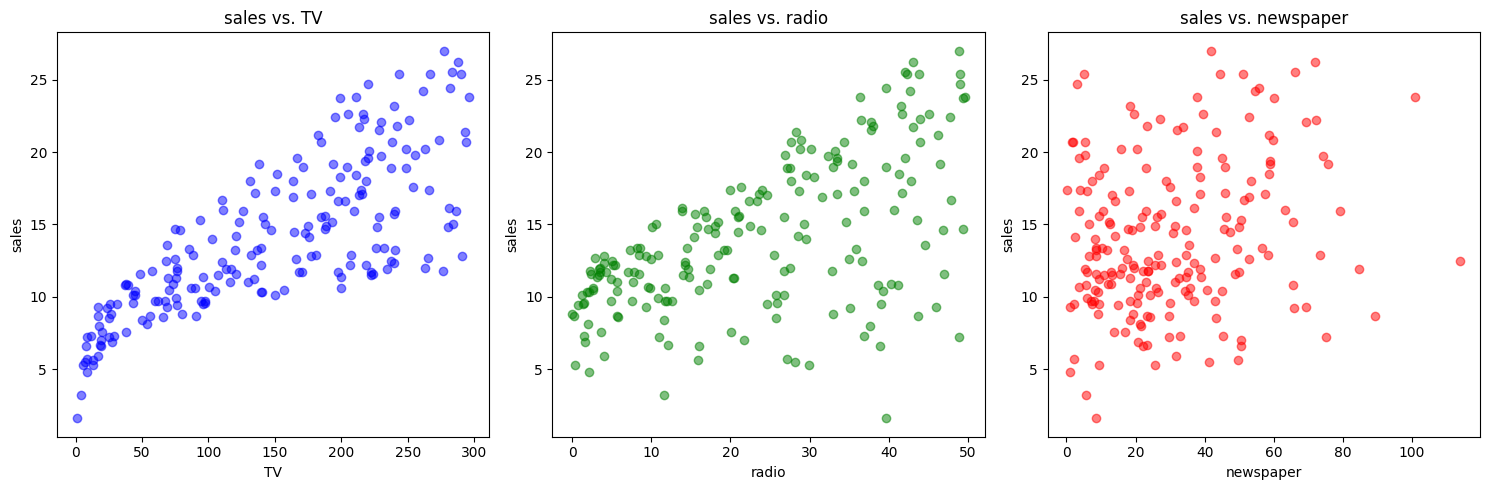

In [5]:
# Plot sales vs. TV
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['sales'], color='blue', alpha=0.5)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('sales vs. TV')

# Plot sales vs. radio
plt.subplot(1, 3, 2)
plt.scatter(df['radio'], df['sales'], color='green', alpha=0.5)
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('sales vs. radio')

# Plot sales vs. newspaper
plt.subplot(1, 3, 3)
plt.scatter(df['newspaper'], df['sales'], color='red', alpha=0.5)
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('sales vs. newspaper')

plt.tight_layout()
plt.show()


In [6]:
# Simple Linear Regression with TV
X_tv = df[['TV']]
y = df['sales']

model_tv = LinearRegression()
model_tv.fit(X_tv, y)

LinearRegression()

In [7]:
# Predicting values
y_pred_tv = model_tv.predict(X_tv)

# Calculate Key Statistical Metrics
rss_tv = np.sum((y - y_pred_tv) ** 2)
tss_tv = np.sum((y - np.mean(y)) ** 2)
r2_tv = r2_score(y, y_pred_tv)
mse_tv = mean_squared_error(y, y_pred_tv)
se_tv = np.sqrt(mse_tv)  # Standard Error of the Residuals

print(f"Residual Sum of Squares (RSS): {rss_tv}")
print(f"Total Sum of Squares (TSS): {tss_tv}")
print(f"R-squared: {r2_tv}")
print(f"Mean Squared Error (MSE): {mse_tv}")
print(f"Residual Standard Error (RSE): {se_tv}")

Residual Sum of Squares (RSS): 2102.5305831313512
Total Sum of Squares (TSS): 5417.14875
R-squared: 0.611875050850071
Mean Squared Error (MSE): 10.512652915656757
Residual Standard Error (RSE): 3.2423221486546887


In [8]:
# Multiple Linear Regression with TV, radio, newspaper
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Add constant for intercept
X = sm.add_constant(X)

model_multi = sm.OLS(y, X).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.58e-96
Time:                        10:23:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

## OLS Regression Results Summary

### Model Fit Statistics

- **Dependent Variable**: `sales`
- **R-squared**: 0.897  
  Approximately 89.7% of the variance in `sales` is explained by the model.
- **Adjusted R-squared**: 0.896  
  Adjusted for the number of predictors, indicating a very good fit.
- **F-statistic**: 570.3  
  High value suggests at least one predictor is significantly related to the dependent variable.
- **Prob (F-statistic)**: 1.58e-96  
  p-value indicates the model is statistically significant.
- **Log-Likelihood**: -386.18  
  Used for model comparison; higher (less negative) values indicate a better fit.
- **No. Observations**: 200  
  Number of observations in the dataset.
- **AIC**: 780.4  
  Akaike Information Criterion; lower values indicate a better model.
- **BIC**: 793.6  
  Bayesian Information Criterion; lower values indicate a better model.
- **Df Residuals**: 196  
  Degrees of freedom of residuals.
- **Df Model**: 3  
  Number of predictors in the model.

### Coefficients and Significance

| Predictor   | Coefficient | Std. Error | t-Statistic | p-Value | 95% Confidence Interval |
|-------------|-------------|------------|-------------|---------|-------------------------|
| const        | 2.9389      | 0.312      | 9.422       | 0.000   | [2.324, 3.554]          |
| TV           | 0.0458      | 0.001      | 32.809      | 0.000   | [0.043, 0.049]          |
| Radio        | 0.1885      | 0.009      | 21.893      | 0.000   | [0.172, 0.206]          |
| Newspaper    | -0.0010     | 0.006      | -0.177      | 0.860   | [-0.013, 0.011]         |

- **Intercept (const)**: 2.9389  
  The estimated `Sales` when all predictors are zero.
- **TV**: 0.0458  
  Estimated increase in `Sales` for each unit increase in `TV` advertising.
- **Radio**: 0.1885  
  Estimated increase in `Sales` for each unit increase in `Radio` advertising.
- **Newspaper**: -0.0010  
  Estimated decrease in `Sales` for each unit increase in `Newspaper` advertising. Not statistically significant (p-value = 0.860).

### Statistical Tests and Diagnostics

- **Omnibus**: 60.414  
  Test for normality of residuals. High value suggests non-normal residuals.
- **Prob(Omnibus)**: 0.000  
  p-value indicates residuals are not normally distributed.
- **Jarque-Bera (JB)**: 151.241  
  Another test for normality of residuals. High value suggests non-normal residuals.
- **Prob(JB)**: 1.44e-33  
  p-value indicates residuals are not normally distributed.
- **Skew**: -1.327  
  Negative skew indicates a longer left tail in residual distribution.
- **Kurtosis**: 6.332  
  Higher kurtosis indicates heavier tails in residual distribution.
- **Condition Number**: 454  
  Indicates potential issues with multicollinearity; values above 30 suggest potential concern.

### Summary

- The model explains a high percentage of the variance in `Sales` (R-squared = 0.897).
- `TV` and `Radio` are significant predictors of `Sales`, while `Newspaper` is not.
- Potential issues with the normality of residuals and multicollinearity may need further investigation.


## Pair Plot of the Predictors vs. Target:

Purpose: To visualize the relationships between each predictor (independent variable) and the target variable (dependent variable).

Interpretation:
This plot shows scatter plots for each pair of variables and regression lines if specified. It helps in understanding the individual relationships between predictors and the target variable.
Strong linear relationships between predictors and the target are usually indicated by a clear, straight-line pattern in the scatter plots.

This plot can also help identify any obvious outliers or non-linear patterns that may affect the model.

In [9]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')
plt.show()

NameError: name 'sns' is not defined

## Residual Plot 
Purpose: To check the assumption of linearity and homoscedasticity (constant variance).

This plot shows the residuals (errors) against the predicted sales values. Ideally, residuals should be randomly scattered around zero, with no clear pattern. This suggests that the model's assumptions are valid.

Interpretation: The residuals should be randomly scattered around zero, without any clear pattern. If you see a pattern (e.g., a curve), it indicates a non-linear relationship.
If the spread of residuals increases or decreases, it might suggest heteroscedasticity (non-constant variance).

In [ ]:
# Residuals vs. Fitted Values Plot
fitted_values = model_multi.fittedvalues
residuals = model_multi.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values: predicted sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

## Q-Q Plot of Residuals
Purpose: To check the normality of residuals. If the residuals are normally distributed, they should lie on the line in the Q-Q plot.

The Q-Q plot compares the distribution of the residuals to a normal distribution. If the residuals fall along the 45-degree line, it suggests that they are normally distributed, which supports the assumptions of linear regression.

Interpretation:

Points should lie close to the diagonal line where predicted values equal actual values.
Large deviations from the line indicate prediction errors or model inadequacies.

In [ ]:
# Q-Q plot of residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


## Predicted vs. Actual Plot 
Purpose: To evaluate how well the model's predictions match the actual data.

This plot shows how the actual sales values compare to the predicted sales values. The red dashed line represents perfect predictions (actual = predicted). The closer the points are to this line, the better the model's predictions.

Interpretation:

Points should lie close to the diagonal line where predicted values equal actual values.
Large deviations from the line indicate prediction errors or model inadequacies.

In [ ]:
# Predicted sales from the model
y_pred = model_multi.predict(X)

# Scatter plot of actual vs. predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

## Histogram of Residuals

The histogram shows the distribution of residuals. A roughly normal distribution (bell curve) indicates that the errors are normally distributed, which is a good sign for the linear regression model.

Interpretation:

The histogram should resemble a bell curve (normal distribution).
Skewness or kurtosis in the histogram may suggest issues with the model.

In [ ]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Histogram: Distribution of Residuals')
plt.show()


## Partial Regression Plots
Purpose: To understand the effect of each predictor while controlling for the others.

Interpretation:

A linear pattern suggests that the predictor has a linear relationship with the target variable.
Non-linear patterns or lack of correlation might suggest that the predictor isn’t contributing much to the model.

In [ ]:
# Partial regression plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model_multi, fig=fig)
plt.show()

## 3D Plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you want to visualize TV and radio vs. sales
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(df['TV'], df['radio'], y, c='blue', marker='o')

# Create a mesh grid for TV and radio
tv = np.linspace(df['TV'].min(), df['TV'].max(), 10)
radio = np.linspace(df['radio'].min(), df['radio'].max(), 10)
tv, radio = np.meshgrid(tv, radio)

# Predicted sales based on the model
z = model_multi.params[0] + model_multi.params[1] * tv + model_multi.params[2] * radio

# Surface plot
ax.plot_surface(tv, radio, z, color='red', alpha=0.3)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.title('3D Plot of TV and Radio vs. Sales')
plt.show()

In [10]:
# Example new data for prediction
new_data = pd.DataFrame({
    'TV': [150.0, 200.0],
    'Radio': [20.0, 30.0],
    'Newspaper': [30.0, 40.0]
})
# Add constant if your model includes an intercept
new_data = sm.add_constant(new_data)

# Predict sales for new data
predicted_sales = model_multi.predict(new_data)

# Display predictions
print("Predicted Sales:")
for i, prediction in enumerate(predicted_sales, start=1):
    print(f"Sample {i}: ${prediction:.2f}")

Predicted Sales:
Sample 1: $13.54
Sample 2: $17.71
